In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import os
import sys
from sklearn.utils import shuffle

In [2]:
m = np.zeros((16000,119716)) #matrix

In [3]:
minr = 1000000
minc = 1000000
c =0
desired_size = (346, 346)
Y = np.zeros((16000, 1))
directory = os.fsdecode('/root/autodl-tmp/verification/ROI/')
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".jpeg"):
     #load the image, convert to grayscale and flatten the 2d image 
        img = cv2.cvtColor(cv2.imread(directory+filename), cv2.COLOR_BGR2GRAY)
#         minr = min(minr, img.shape[0])
#         minc = min(minc, img.shape[1])
        #print(c)
        img = cv2.resize(img, desired_size)
        flatten_img = np.reshape(img, (1,-1))
        m[c,:] = flatten_img
        Y[c,:] = int(filename[:3])
        #print(filename)
        #print(img.shape)
        #print(flatten_img.shape)
        c += 1
    else:
        continue

In [4]:
#np.set_printoptions(threshold=10)
#mp = dict()
Y

array([[  1.],
       [  1.],
       [  1.],
       ...,
       [200.],
       [200.],
       [200.]])

In [5]:
from collections import Counter

# Assuming you have a NumPy array with shape (8000, 1)
np_array =Y

# Flatten the NumPy array to get a 1D array
flat_array = np_array.flatten()

# Use Counter to count occurrences
counter_dict = dict(Counter(flat_array))

# Sort the dictionary by keys
sorted_dict = dict(sorted(counter_dict.items()))

# Print the sorted dictionary
print("Occurrences of each number (sorted by keys):")
for key, value in sorted_dict.items():
    print(f"{key}: {value} times")

Occurrences of each number (sorted by keys):
1.0: 80 times
2.0: 80 times
3.0: 80 times
4.0: 80 times
5.0: 80 times
6.0: 80 times
7.0: 80 times
8.0: 80 times
9.0: 80 times
10.0: 80 times
11.0: 80 times
12.0: 80 times
13.0: 80 times
14.0: 80 times
15.0: 80 times
16.0: 80 times
17.0: 80 times
18.0: 80 times
19.0: 80 times
20.0: 80 times
21.0: 80 times
22.0: 80 times
23.0: 80 times
24.0: 80 times
25.0: 80 times
26.0: 80 times
27.0: 80 times
28.0: 80 times
29.0: 80 times
30.0: 80 times
31.0: 80 times
32.0: 80 times
33.0: 80 times
34.0: 80 times
35.0: 80 times
36.0: 80 times
37.0: 80 times
38.0: 80 times
39.0: 80 times
40.0: 80 times
41.0: 80 times
42.0: 80 times
43.0: 80 times
44.0: 80 times
45.0: 80 times
46.0: 80 times
47.0: 80 times
48.0: 80 times
49.0: 80 times
50.0: 80 times
51.0: 80 times
52.0: 80 times
53.0: 80 times
54.0: 80 times
55.0: 80 times
56.0: 80 times
57.0: 80 times
58.0: 80 times
59.0: 80 times
60.0: 80 times
61.0: 80 times
62.0: 80 times
63.0: 80 times
64.0: 80 times
65.0

In [6]:
m, Y = shuffle(m, Y)

In [7]:
#80% - training
#20% - testing
k = 12800
x_train = m[:k,:]
x_test = m[k:, :]
y_train = Y[:k, :]
y_test = Y[k:, :]

In [8]:
from sklearn import decomposition

In [9]:
pca = decomposition.PCA(n_components = 250, whiten=True)
pca.fit(x_train)

PCA(n_components=250, whiten=True)

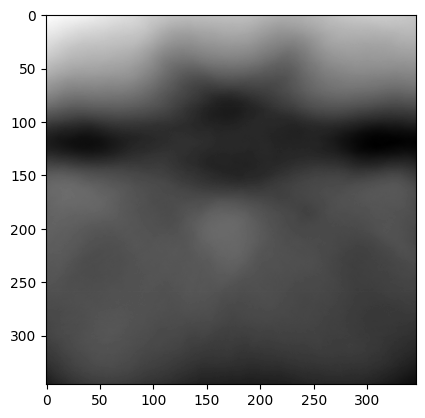

In [10]:
plt.imshow(pca.mean_.reshape(346,346), cmap = 'gray')

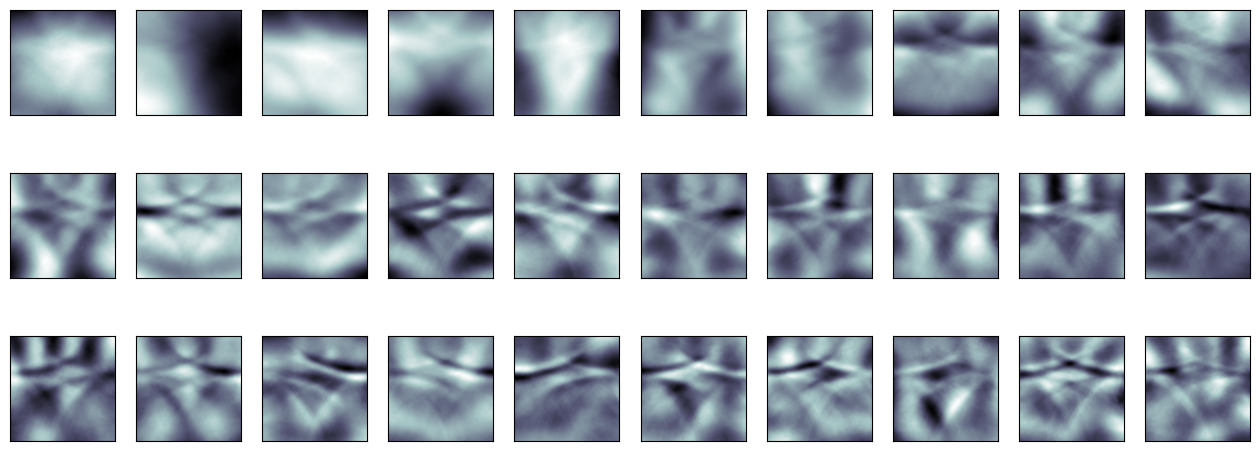

In [11]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(346,346),
              cmap=plt.cm.bone)

In [12]:
X_train_pca = pca.transform(x_train)
X_test_pca = pca.transform(x_test)
print(X_train_pca.shape)

(12800, 250)


In [13]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

/root/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=5.0, gamma=0.001)

In [15]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
report = metrics.classification_report(y_test, y_pred, output_dict=True)

In [36]:
precision = []
f1 = []
recall = []
accuracy = []
for key in report:
    if len(recall) == 200:
        break
    precision.append(report[key]['precision'])
    recall.append(report[key]['recall'])
    f1.append(report[key]['f1-score'])

In [70]:
x = [i for i in range(1,201, 10)]
prec_y = [precision[i] for i in range(1,201,10)]
rec_y = [recall[i] for i in range(1,201,10)]
f1_y = [f1[i] for i in range(1,201,10)]

Text(0, 0.5, 'Precision')

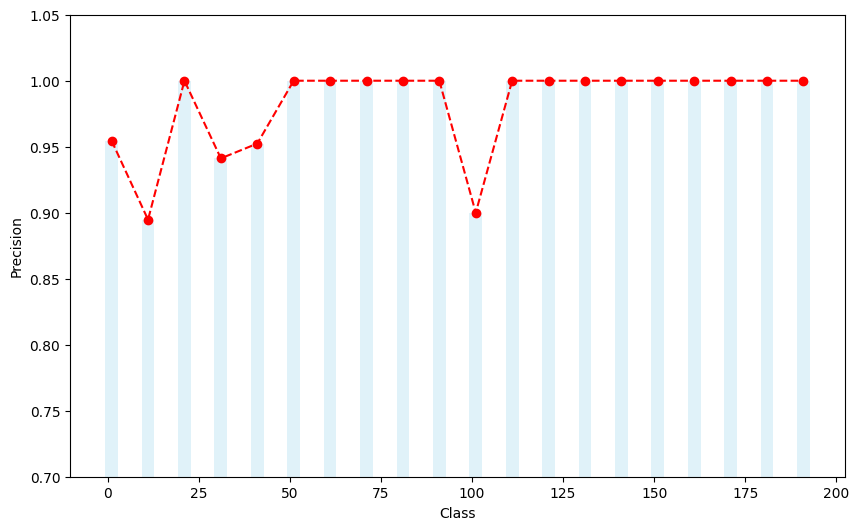

In [79]:
plt.figure(figsize=(10, 6))
bars = plt.bar(x, prec_y, width=3.5, color='skyblue', alpha = 0.25)
plt.ylim([0.7,1.05])
bar_midpoints = [bar.get_x() + bar.get_width() / 2 for bar in bars]
plt.plot(bar_midpoints, prec_y, marker='o', linestyle='--', color='red', label='Midpoint Line')
plt.xlabel('Class')
plt.ylabel('Precision')

Text(0, 0.5, 'Recall')

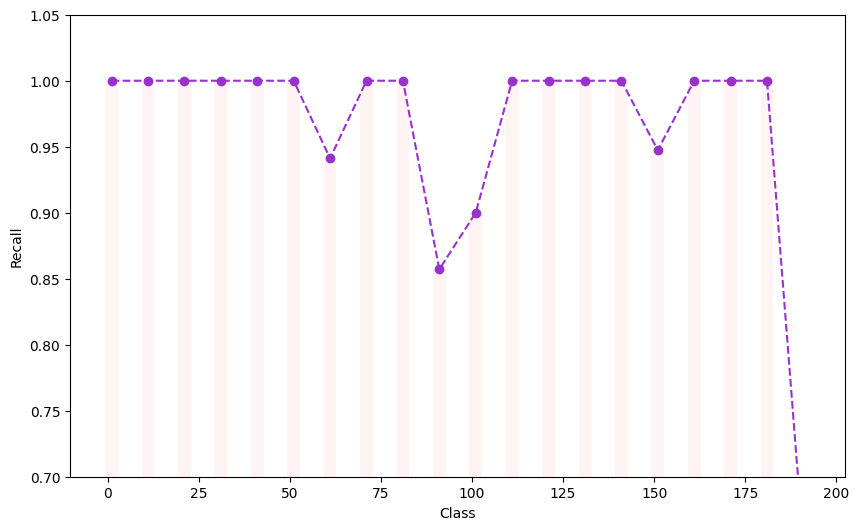

In [91]:
plt.figure(figsize=(10, 6))
bars = plt.bar(x, rec_y, width=3.5, color='mistyrose', alpha = 0.4)
plt.ylim([0.7,1.05])
bar_midpoints = [bar.get_x() + bar.get_width() / 2 for bar in bars]
plt.plot(bar_midpoints, rec_y, marker='o', linestyle='--', color='darkorchid', label='Midpoint Line')
plt.xlabel('Class')
plt.ylabel('Recall')

Text(0, 0.5, 'F1-Score')

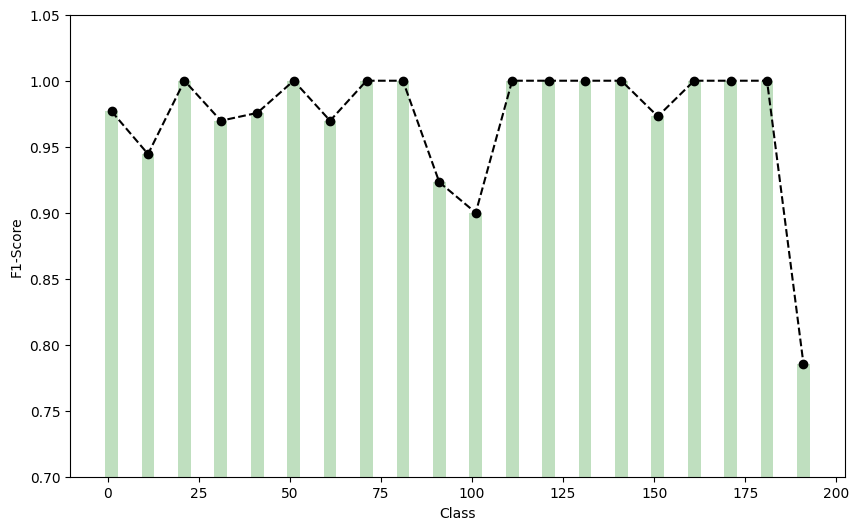

In [75]:
plt.figure(figsize=(10, 6))
bars = plt.bar(x, f1_y, width=3.5, color='green', alpha = 0.25)
plt.ylim([0.7,1.05])
bar_midpoints = [bar.get_x() + bar.get_width() / 2 for bar in bars]
plt.plot(bar_midpoints, f1_y, marker='o', linestyle='--', color='black', label='Midpoint Line')
plt.xlabel('Class')
plt.ylabel('F1-Score')

In [ ]:
# for n_components = 1280 (10% of test_set)
#   accuracy                           0.87      3200
#    macro avg       0.93      0.87      0.89      3200
# weighted avg       0.93      0.87      0.88      3200
# general observation -> more number of n_components => less accuracy


#for n_components = 500
#     accuracy                           0.95      3200
#    macro avg       0.96      0.95      0.95      3200
# weighted avg       0.96      0.95      0.95      3200

#for n_components = 200
#     accuracy                           0.96      3200
#    macro avg       0.96      0.96      0.96      3200
# weighted avg       0.96      0.96      0.96      3200

#for n_components = 150
#     accuracy                           0.95      3200
#    macro avg       0.95      0.95      0.95      3200
# weighted avg       0.96      0.95      0.95      3200

#    accuracy                           0.96      3200
#    macro avg       0.96      0.96      0.96      3200
# weighted avg       0.96      0.96      0.96      3200

In [9]:
from sklearn import svm, metrics

In [10]:
n_comp_arr = [1, 5, 10, 20, 40, 60, 80, 100, 125, 150, 175, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500]
acc_arr = []
y_train = np.ravel(y_train)

for n_comp in n_comp_arr:
    print(n_comp)
    pca = decomposition.PCA(n_components = n_comp, whiten=True)
    pca.fit(x_train)
    X_train_pca = pca.transform(x_train)
    X_test_pca = pca.transform(x_test)
    clf = svm.SVC(C=5., gamma=0.001)
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Acc: " + str(acc))
    acc_arr.append(acc)

1
Acc: 0.0040625
5
Acc: 0.0290625
10
Acc: 0.1071875
20
Acc: 0.346875
40
Acc: 0.7234375
60
Acc: 0.8678125
80
Acc: 0.91375
100
Acc: 0.9390625
125
Acc: 0.953125
150
Acc: 0.96375
175
Acc: 0.965625
200
Acc: 0.966875
250
Acc: 0.9671875
300
Acc: 0.9665625
350
Acc: 0.9628125
400
Acc: 0.9603125
450
Acc: 0.9565625
500
Acc: 0.9525
550
Acc: 0.950625
600
Acc: 0.9465625
650
Acc: 0.9396875
700
Acc: 0.9384375
750
Acc: 0.9340625
800
Acc: 0.93
900
Acc: 0.9171875
1000
Acc: 0.9090625
1100
Acc: 0.8965625
1200
Acc: 0.88125
1300
Acc: 0.8709375
1400
Acc: 0.8559375
1500
Acc: 0.8396875
1600
Acc: 0.8253125
1700
Acc: 0.8090625
1800
Acc: 0.790625
1900
Acc: 0.7721875
2000
Acc: 0.7521875
2100
Acc: 0.7371875
2200
Acc: 0.6640625


In [11]:
acc_arr

[0.0040625,
 0.0290625,
 0.1071875,
 0.346875,
 0.7234375,
 0.8678125,
 0.91375,
 0.9390625,
 0.953125,
 0.96375,
 0.965625,
 0.966875,
 0.9671875,
 0.9665625,
 0.9628125,
 0.9603125,
 0.9565625,
 0.9525,
 0.950625,
 0.9465625,
 0.9396875,
 0.9384375,
 0.9340625,
 0.93,
 0.9171875,
 0.9090625,
 0.8965625,
 0.88125,
 0.8709375,
 0.8559375,
 0.8396875,
 0.8253125,
 0.8090625,
 0.790625,
 0.7721875,
 0.7521875,
 0.7371875,
 0.7140625,
 0.7,
 0.6803125,
 0.6640625]

Text(0, 0.5, 'Accuracy')

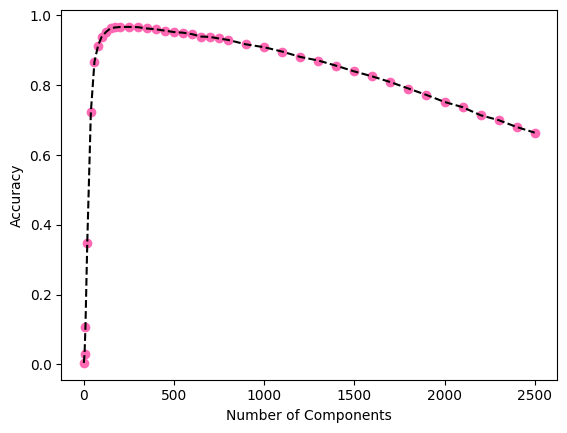

In [24]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
ax.plot(n_comp_arr,acc_arr, linestyle='dashed', color='black')
ax.scatter(n_comp_arr,acc_arr, color='hotpink')
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")